In [1]:
import numpy as np
import matplotlib.pyplot as plt

# A. Calibration of Galvanometer

In [2]:
t1 = np.array([10.2, 10.1, 2.8, 2.9, 5.5, 5.3, 1.3, 1.2])
t3 = np.array([7.4, 7.3, 1.9, 2.0, 3.9, 3.8, 0.9, 0.9])

In [3]:
d = t1*(t1/t3)**0.25 #d in cm

print(np.round(10*d, 1)) # d in mm

[110.5 109.5  30.9  31.8  59.9  57.6  14.3  12.9]


In [4]:
V = 1.5
Re = 33000
Rf = 48
Rg = 115

Res = (Re+ Rf)/(Re+Rf+Rg)
C = np.array([219.6, 219.6, 55, 55, 108, 108, 22.3, 22.3])


K = C*1e-9 *V * Res/d

print(K)

[2.97011101e-08 2.99670480e-08 2.66493230e-08 2.58348129e-08
 2.69351362e-08 2.80289899e-08 2.33893919e-08 2.58506557e-08]


In [5]:
K = sum(K)/len(K)

Final Calibration Constant value in Coulomb/mm

In [6]:
K

2.704455845722341e-08

# B. Measurement of magnetic field using flip coil

First for forward current

In [7]:
# B part
add = 0.5 # offset

# t1, t3 are im cm
t1 = np.array([-0.1, -0.1, 0.2, 0.7, 1, 2, 2.5, 2.9, 2.5, 2.6, 3.2, 3.5, 5]) + add
t3 = np.array([-0.4, -0.3, -0.1, 0.4, 0.5, 1.1, 1.7, 1.9, 1.6, 1.4, 1.7, 2.2, 3.4]) + add

In [8]:
t1*(t1 / t3)**0.25 # deflection in cm

array([0.56568542, 0.47568285, 0.80511432, 1.28948392, 1.66002288,
       2.79508497, 3.24187226, 3.70933311, 3.27979534, 3.50359354,
       4.21353383, 4.41300123, 5.99359247])

In [9]:
defl= t1*(t1/t3)**0.25 * 10 #defl is in mm

print(np.round(defl, 1)) # defl values in mm are printed

[ 5.7  4.8  8.1 12.9 16.6 28.  32.4 37.1 32.8 35.  42.1 44.1 59.9]


In [10]:
NA = 214 # NA in cm^2
NA = NA*1e-4 # NA in m^2

defl # defl in now in mm as K is in C/mm

array([ 5.65685425,  4.75682846,  8.05114322, 12.89483918, 16.6002288 ,
       27.95084972, 32.41872259, 37.09333108, 32.79795342, 35.03593541,
       42.13533827, 44.13001226, 59.93592471])

In [11]:
R = Re + Rf + Rg
print(R, "ohm")

B = R*K*defl/(2*NA)

33163 ohm


In [12]:
33163*K*defl/(2*NA)

array([0.11854   , 0.09967986, 0.16871259, 0.27021277, 0.34785961,
       0.58571312, 0.67933789, 0.77729482, 0.68728471, 0.73418187,
       0.88295063, 0.92474924, 1.25596387])

Final results of magnetic field in forward current

In [13]:
B=B*1e8
np.round(B/1e5, 1)

array([ 118.5,   99.7,  168.7,  270.2,  347.9,  585.7,  679.3,  777.3,
        687.3,  734.2,  883. ,  924.7, 1256. ])

In [14]:
I = np.array([0.11, 0.20, 0.29, 0.39, 0.49, 0.6, 0.7, 0.81, 0.91, 1.00, 1.09, 1.20, 1.29])

Now for reverse current

In [15]:
# For reverse current
theta1 = np.array([0.7, 1.1, 1.7, 2.1, 2.6, 3.1, 3.7, 4.2, 4.7, 5.4, 5.7, 6.2, 6.6])
theta3 = np.array([0.3, 0.8, 1.2, 1.5, 1.8, 2.2, 2.6, 3.0, 3.3, 3.9, 4.0, 4.4, 4.7])

def2 = theta1*(theta1/theta3)**0.25 * 10 #deflection (rev. current) is in mm
print(def2, "is deflection in mm for reverse current")

B2= R*K*def2/(2*NA)
print(B2)
B2=B2*1e8

# Final results of magnetic field in reverse current
np.round(B2/1e5, 1)

[ 8.65151642 11.91155224 18.54666554 22.84290342 28.50352412 33.77508472
 40.41185798 45.68580685 51.34448918 58.57685465 62.27712736 67.55016944
 71.8464733 ] is deflection in mm for reverse current
[0.18129348 0.24960788 0.38864741 0.47867555 0.59729447 0.7077606
 0.84683491 0.95735109 1.0759294  1.22748441 1.30502403 1.41552121
 1.50555072]


array([ 181.3,  249.6,  388.6,  478.7,  597.3,  707.8,  846.8,  957.4,
       1075.9, 1227.5, 1305. , 1415.5, 1505.6])

## Plots of mag field vs forward and reverse current

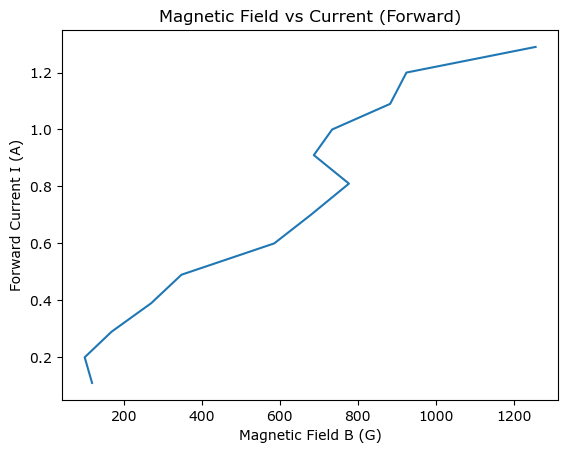

In [16]:
plt.plot(B/1e5, I)
plt.xlabel("Magnetic Field B (G)")
plt.ylabel("Forward Current I (A)")
plt.title("Magnetic Field vs Current (Forward)")
plt.show()

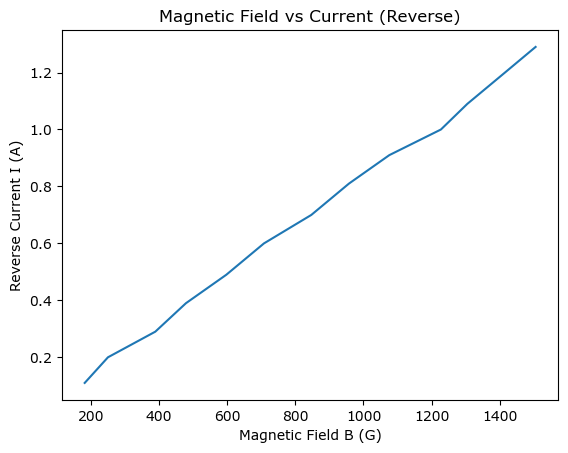

In [17]:
plt.plot(B2/1e5, I)
plt.xlabel("Magnetic Field B (G)")
plt.ylabel("Reverse Current I (A)")
plt.title("Magnetic Field vs Current (Reverse)")
plt.show()

# Determination of Verdet Constant for the given glass blocks (light and dense flint)

In [18]:
# Given data

nl = 1.56 #ref index for light flint
nd = 1.65 # ref index for extra dense flint
L = 1.8 # length of the sample

In [19]:
B[0]/1e5

118.54000095281903

## Extra Dense Flint at different currents

In [20]:
# Dark Flint

thi9 = np.array([122.8, 123.0, 123.0, 123.3])
thf9 = np.array([127.5, 126.8, 126.8, 125.6])

V = (thf9 - thi9)/(nl * L * (B[8] + B2[8])/1e5)
print(np.round(V*1e4,2), "* 10^(-4) is the V const for Dense flint at 0.9 A")

[9.49 7.68 7.68 4.65] * 10^(-4) is the V const for Dense flint at 0.9 A


In [21]:
np.average(V*1e4)

7.372091359770513

In [22]:
# Dark Flint

thi11 = np.array([124.0, 123.7, 124.2, 123.6])
thf11 = np.array([128.0, 127.5, 127.6, 127.0])

V = (thf11 - thi11)/(nl * L * (B[10] + B2[10])/1e5)
print(np.round(V*1e4,2), "* 10^(-4) is the V const for Dense flint at 1.1 A")

[6.51 6.19 5.53 5.53] * 10^(-4) is the V const for Dense flint at 1.1 A


In [23]:
np.average(V*1e4)

5.940916827410247

In [24]:
# Dark Flint

thi13 = np.array([124.9, 124.9, 124.8, 124.8])
thf13 = np.array([128.5, 128.5, 129.2, 129.2])

V = (thf13 - thi13)/(nl * L * (B[12] + B2[12])/1e5)
print(np.around(V*1e4,2), "* 10^(-4) is the V const for Dense flint at 1.3 A")

[4.64 4.64 5.67 5.67] * 10^(-4) is the V const for Dense flint at 1.3 A


In [25]:
np.average(V*1e4)

5.158406281367446

# Light Flint at differet currents

In [26]:
# Light Flint

dense_thi9 = np.array([124.9, 123.9, 123.9, 123.9])
dense_thf9 = np.array([127.2, 127.2, 127.0, 127.0])

V = (dense_thf9 - dense_thi9)/(nd * L * (B[8] + B2[8])/1e5)
print(np.round(V*1e4,2), "* 10^(-4) is the V const for light flint at 0.9 A")

[4.39 6.3  5.92 5.92] * 10^(-4) is the V const for light flint at 0.9 A


In [27]:
np.average(V*1e4)

5.633269313020152

In [28]:
# Light Flint

dense_thf11 = np.array([129.4, 128.3, 127.4, 128.8])
dense_thi11 = np.array([125.3, 124.6, 124.9, 124.6])

V = (dense_thf11 - dense_thi11)/(nd * L * (B[10] + B2[10])/1e5)
print(np.round(V*1e4,2), "* 10^(-4) is the V const for light flint at 1.1 A")

[6.31 5.69 3.85 6.46] * 10^(-4) is the V const for light flint at 1.1 A


In [29]:
np.average(V*1e4)

5.578395128103788

In [30]:
# Light Flint

dense_thi13 = np.array([125.8, 125.8, 125.7, 125.7])
dense_thf13 = np.array([130.0, 128.9, 128.9, 130.0])

V = (dense_thf9 - dense_thi9)/(nd * L * (B[12] + B2[12])/1e5)
print(np.round(V*1e4,2), "* 10^(-4) is the V const for light flint at 1.3 A")

[2.8  4.02 3.78 3.78] * 10^(-4) is the V const for light flint at 1.3 A


In [31]:
np.average(V*1e4)

3.5968160161898477

In [32]:
pip install nbconvert[webpdf]

Defaulting to user installation because normal site-packages is not writeable
INFO: pip is looking at multiple versions of nbconvert[webpdf] to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of nbconvert[webpdf] to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
